## Actitracker

### Download data (Last Accessed: 10/10/17)

In [ ]:
!wget 'http://www.cis.fordham.edu/wisdm/includes/datasets/latest/WISDM_ar_latest.tar.gz' 
!tar -xvzf "WISDM_ar_latest.tar.gz"
!rm "WISDM_ar_latest.tar.gz"

--2017-10-10 10:24:31--  http://www.cis.fordham.edu/wisdm/includes/datasets/latest/WISDM_ar_latest.tar.gz
Resolving www.cis.fordham.edu... 150.108.68.29
Connecting to www.cis.fordham.edu|150.108.68.29|:80... 

connected.
HTTP request sent, awaiting response... 

200 OK
Length: 11404612 (11M) [application/x-gzip]
Saving to: ‘WISDM_ar_latest.tar.gz’

WISDM_ar_latest.tar   0%[                    ]       0  --.-KB/s               

WISDM_ar_latest.tar   0%[                    ]  85.18K   345KB/s               

WISDM_ar_latest.tar   3%[                    ] 430.47K   873KB/s               

WISDM_ar_latest.tar   9%[>                   ]   1.07M  1.54MB/s               

WISDM_ar_latest.tar  18%[==>                 ]   1.97M  2.21MB/s               

WISDM_ar_latest.tar  25%[====>               ]   2.82M  2.58MB/s               

WISDM_ar_latest.tar  34%[=====>              ]   3.78M  2.92MB/s               

WISDM_ar_latest.tar  43%[=======>            ]   4.76M  3.18MB/s               

WISDM_ar_latest.tar  52%[=========>          ]   5.72M  3.38MB/s               

WISDM_ar_latest.tar  61%[===========>        ]   6.70M  3.54MB/s               

WISDM_ar_latest.tar  70%[=============>      ]   7.66M  3.65MB/s               

WISDM_ar_latest.tar  78%[==============>     ]   8.55M  3.72MB/s               

WISDM_ar_latest.tar  86%[================>   ]   9.43M  3.78MB/s               

WISDM_ar_latest.tar  96%[==================> ]  10.45M  3.88MB/s               

WISDM_ar_latest.tar 100%[===================>]  10.88M  3.91MB/s    in 2.8s    



2017-10-10 10:24:34 (3.91 MB/s) - ‘WISDM_ar_latest.tar.gz’ saved [11404612/11404612]



x WISDM_ar_v1.1/
x WISDM_ar_v1.1/readme.txt
x WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt


x WISDM_ar_v1.1/WISDM_ar_v1.1_raw_about.txt
x WISDM_ar_v1.1/WISDM_ar_v1.1_transformed.arff
x WISDM_ar_v1.1/WISDM_ar_v1.1_trans_about.txt


In [42]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import re
import os

In [43]:
def readFile(filename):
        return pd.read_csv(filename, names = ["user", "activity", "timeastamp", "x", 'y','z'])

In [44]:
def numNullVals(df):
   numNull = pd.isnull(df).any(axis=1).sum()
   print('Number of rows with null values: {}  which is {} of the dataset'.format( numNull, numNull/len(data)))

### Read raw data

In [45]:
cwd = os.getcwd()
data = readFile(cwd+'/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt')
data.head()
print('Data shape: {}'.format(data.shape))

Data shape: (1098204, 6)


#### Semi-colon from the end of each row needs to be removed.

## Basic features of data
### Number of row, users and activities

In [46]:
print('Number of rows, columns: {}, {}'.format(data.shape[0], data.shape[1]))

Number of rows, columns: 1098204, 6


In [47]:
print('Number of  users:', len(data.user.unique()))
print('Unique users: ', data.user.unique())
users = data.user.unique()

Number of  users: 36
Unique users:  [33 17 20 29 13 15  6 27 36 18 32 35 11 16  5 10 28 26 14 24 12 23  4 30 34
  8 31 21  3 22  1  9 25  2  7 19]


In [48]:
print('Number of activities: {}\n'.format(len(data.activity.unique())))
print('Activity values: {}\n'.format(data.activity.unique()))
print('Activity counts:\n{}\n'.format(data.activity.value_counts(dropna=False)))

Number of activities: 6

Activity values: ['Jogging' 'Walking' 'Upstairs' 'Downstairs' 'Sitting' 'Standing']

Activity counts:
Walking       424398
Jogging       342176
Upstairs      122869
Downstairs    100427
Sitting        59939
Standing       48395
Name: activity, dtype: int64



### Label distribution

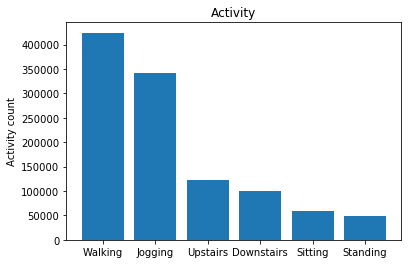

In [49]:
fig = plt.figure()
labels = []
label_counts = []
# Place keys and values into list to maintain order. 
for k, v in data.activity.value_counts(dropna=False).items():
    labels.append(k)
    label_counts.append(v)
y = np.arange(len(labels))
plt.bar(y, label_counts )
plt.xticks(y, labels)
plt.ylabel('Activity count')
plt.title('Activity')
plt.show()
fig.savefig('plot')

### Data Types:

In [50]:
data.dtypes

user            int64
activity       object
timeastamp      int64
x             float64
y             float64
z              object
dtype: object

#### 'z' channel is an object, being read in as a string because of semi-colon at the end (numpy array elements all need to be the same length so strings stored as objects)

### Null values

#### Count number of null values

In [51]:
numNullVals(data)

Number of rows with null values: 1  which is 9.10577634027922e-07 of the dataset


In [52]:
null_rows = data[data.isnull().any(axis=1)]
null_rows.head()

,user,activity,timeastamp,x,y,z
343416,11,Walking,1867172313000,4.4,4.4,NaN


In [53]:
all_sensors_null = data.loc[(data.x.isnull()) & (data.y.isnull()) & (data.z.isnull())]
print('Number of rows where all accelerometer data is null: ',len(null_rows))

Number of rows where all accelerometer data is null:  1


#### Number of unique users that had periods of null sensor readings: 

In [54]:
null_rows['user'].value_counts()

11    1
Name: user, dtype: int64

### Remove semi-colons from the z axis. 

In [55]:
#Remove semi-colons at the end of each line (first have to convert to string).
removeSemi = lambda x: re.sub(r";", " " , x)
data['z'] = data['z'].astype(str)
data['z'] = data['z'].apply(removeSemi)

#### Convert z axis to numeric: Any non-numeric values get NaN values. 

In [57]:
z = data['z']
z = pd.to_numeric(z, errors='coerce')

#### Get index of bad values

In [58]:
bad_samples = z.index[z.apply(np.isnan)]

In [59]:
data.iloc[bad_samples]

,user,activity,timeastamp,x,y,z
134633,13,Downstairs,3498732310000,5.13,10.42,4.671779 15
197686,27,Jogging,10814072309000,4.21,-0.65,-0.6537767 27
273260,18,Jogging,0,0.00,0.00,0.0 18
343416,11,Walking,1867172313000,4.40,4.40,nan
371928,16,Downstairs,7160742320000,4.79,7.31,-4.0588636 5
711479,30,Standing,1729732341000,-1.80,9.28,3.79 34


Semi colon in the middle of some of the data points, space in their place when removed. 

In [60]:
data[['x','y','z']] = data[['x','y','z']].apply(pd.to_numeric, errors='coerce')

### Very few samples involved. Each sample checked to see if it is more appropriate to drop (at the end/beginning of an activity) or interpolate (in the middle of activity).

In [61]:
data.loc[134632:134634]

,user,activity,timeastamp,x,y,z
134632,13,Downstairs,3498682201000,1.99,7.86,2.914754
134633,13,Downstairs,3498732310000,5.13,10.42,NaN
134634,15,Jogging,329032176000,-1.42,2.26,-5.625204


In [62]:
data.loc[134632:134634]
data = data.drop(134633)
data.loc[134632:134634]

,user,activity,timeastamp,x,y,z
134632,13,Downstairs,3498682201000,1.99,7.86,2.914754
134634,15,Jogging,329032176000,-1.42,2.26,-5.625204


In [63]:
data.loc[197685:197687]

,user,activity,timeastamp,x,y,z
197685,27,Jogging,10814022199000,8.73,5.56,-2.72407
197686,27,Jogging,10814072309000,4.21,-0.65,NaN
197687,27,Jogging,0,0.00,0.00,0.00000


In [64]:
data.loc[197685:197687] = data.loc[197685:197687].interpolate()
data.loc[197685:197687]

,user,activity,timeastamp,x,y,z
197685,27,Jogging,10814022199000,8.73,5.56,-2.724070
197686,27,Jogging,10814072309000,4.21,-0.65,-1.362035
197687,27,Jogging,0,0.00,0.00,0.000000


In [65]:
data.loc[273259:273261]

,user,activity,timeastamp,x,y,z
273259,18,Jogging,0,0.0,0.0,0.0
273260,18,Jogging,0,0.0,0.0,NaN
273261,18,Jogging,0,0.0,0.0,0.0


In [66]:
data.loc[273259:273261] = data.loc[273259:273261].interpolate()
data.loc[273259:273261]

,user,activity,timeastamp,x,y,z
273259,18,Jogging,0,0.0,0.0,0.0
273260,18,Jogging,0,0.0,0.0,0.0
273261,18,Jogging,0,0.0,0.0,0.0


In [67]:
data.loc[343415:343417]

,user,activity,timeastamp,x,y,z
343415,11,Walking,1787072368000,-2.56,8.58,1.879608
343416,11,Walking,1867172313000,4.40,4.40,NaN
343417,11,Walking,1867222270000,5.48,8.43,9.724928


In [68]:
data.loc[343415:343417]= data.loc[343415:343417].interpolate()
data.loc[343415:343417]

,user,activity,timeastamp,x,y,z
343415,11,Walking,1787072368000,-2.56,8.58,1.879608
343416,11,Walking,1867172313000,4.40,4.40,5.802268
343417,11,Walking,1867222270000,5.48,8.43,9.724928


In [69]:
data.loc[371927:371929]

,user,activity,timeastamp,x,y,z
371927,16,Downstairs,7160692302000,8.20,9.77,-5.094010
371928,16,Downstairs,7160742320000,4.79,7.31,NaN
371929,5,Walking,1202312298000,-0.95,5.01,1.648062


In [70]:
data.loc[371927:371929]
data = data.drop(371928)
data.loc[371927:371929]

,user,activity,timeastamp,x,y,z
371927,16,Downstairs,7160692302000,8.20,9.77,-5.094010
371929,5,Walking,1202312298000,-0.95,5.01,1.648062


In [71]:
data.loc[711478:711480]

,user,activity,timeastamp,x,y,z
711478,30,Standing,1729682292000,-1.38,9.70,2.03
711479,30,Standing,1729732341000,-1.80,9.28,NaN
711480,34,Walking,295862346000,-4.10,9.28,-13.78


In [72]:
data = data.drop(711479)
data.loc[711478:711480]

,user,activity,timeastamp,x,y,z
711478,30,Standing,1729682292000,-1.38,9.70,2.03
711480,34,Walking,295862346000,-4.10,9.28,-13.78


In [73]:
data.loc[711476:711481]

,user,activity,timeastamp,x,y,z
711476,30,Standing,1729582316000,-3.06,8.73,1.99
711477,30,Standing,1729632335000,-3.64,8.96,1.69
711478,30,Standing,1729682292000,-1.38,9.70,2.03
711480,34,Walking,295862346000,-4.10,9.28,-13.78
711481,34,Walking,295912334000,-5.63,-2.30,-4.02


#### Index reset after dropping rows

In [74]:
data = data.reset_index()
data = data.drop('index', axis = 1)

### Spectrogram Analysis

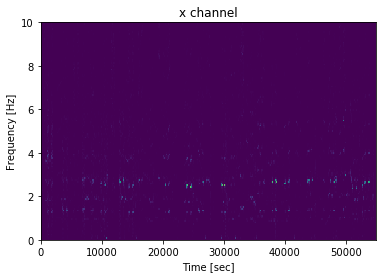

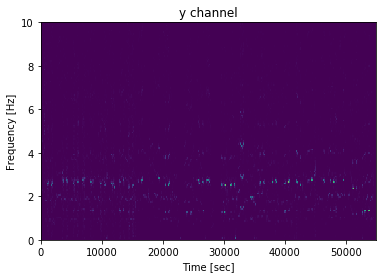

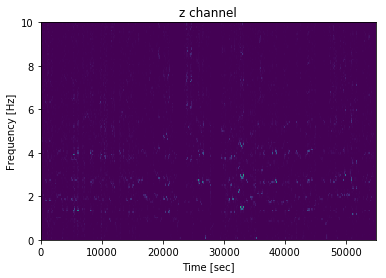

In [76]:
fs = 20
data_x = data['x']
data_y = data['y']
data_z = data['z']

plt.plot(figsize=(20,20))
f_x, t_x, S_x = signal.spectrogram(data_x, fs)
plt.pcolormesh(t_x, f_x, S_x)
plt.title('x channel')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


f_y, t_y, S_y = signal.spectrogram(data_y, fs)
plt.title('y channel')

plt.pcolormesh(t_y, f_y, S_y)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


f_z, t_z, S_z = signal.spectrogram(data_z, fs)
plt.title('z channel')
plt.pcolormesh(t_z, f_z, S_z)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

#### Plot in time domain

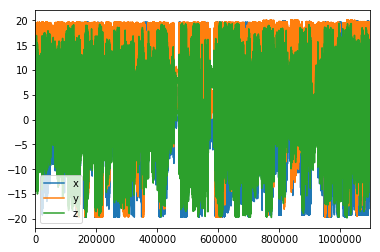

In [77]:
data[['x','y', 'z']] .plot()

In [78]:
# For performing normalisation: http://stackoverflow.com/questions/12525722/normalize-data-in-pandas
# Min-max normalisation
data[['x','y', 'z']]  = (data[['x','y', 'z']]  - data[['x','y', 'z']].min())/ (data[['x','y', 'z']].max()-data[['x','y', 'z']].min())

#### Check range

In [79]:
data[['x','y', 'z']].min()

x    0.0
y    0.0
z    0.0
dtype: float64

In [80]:
data[['x','y', 'z']].max()

x    1.0
y    1.0
z    1.0
dtype: float64

In [81]:
data.head()

,user,activity,timeastamp,x,y,z
0,33,Jogging,49105962326000,0.478144,0.814390,0.515198
1,33,Jogging,49106062271000,0.622404,0.778664,0.526603
2,33,Jogging,49106112167000,0.619649,0.769046,0.500337
3,33,Jogging,49106222305000,0.480209,0.961070,0.579135
4,33,Jogging,49106332290000,0.465749,0.799962,0.685236


#### Write cleaned data to new file. 

In [82]:
filename = './data/cleaned_WISDM_v1'
data.to_csv(filename, index=False)

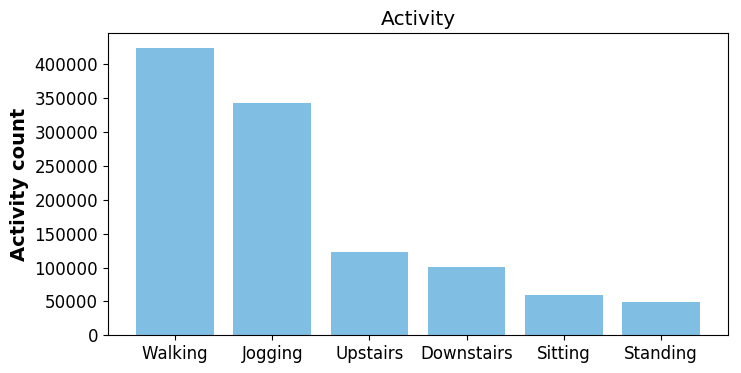

In [95]:
from cycler import cycler


fig = plt.figure()
plt.figure(figsize=(10,10))
plt.rcParams['font.serif'] = 'serif'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['font.size'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

width, height = plt.figaspect(0.5)
fig = plt.figure(figsize=(width,height), dpi=100)

plt.rc('axes', prop_cycle=(cycler('color', ['#80BFE3'])))

labels = []
label_counts = []
# Place keys and values into list to maintain order. 
for k, v in data.activity.value_counts(dropna=False).items():
    labels.append(k)
    label_counts.append(v)
y = np.arange(len(labels))

plt.bar(y, label_counts, )
plt.xticks(y, labels)
plt.ylabel('Activity count')
plt.title('Activity')

barlist=plt.bar(y, label_counts )

plt.show()
fig.savefig('class_distribution')